## Bayesian Decision Theory (not using any framework)




* Parametrik metotlardandır. Yani elimizde bulunan datasetinin bir dağılımından geldiği varsayarız. Bu varsayımdan yola çıkarak örneklemde kısıtlı sayıda parametrenin bilinmesiyle model oluşturmaya imkan verir.
* Elimizdeki verinin Gauss’dan geldiğini varsayarak model oluşturmak için gerekli olan parametre sadece ortalama ve varyans olarak ikidir.
* Diyelim ki elimizde iki adet farklı dataseti var. Bu datasetlerin gaussdan geldiğini varsayarsak datasetinin ortalamalarını ve standart sapmalarını hesapladığımız zaman modelimiz oluşur.
* Her iki sınıf içinde ayrı ayrı gauss dağılımını çizersek, ve bunları her iki sınıfın olma olasılığı ile çarparsak modellerimizi elde etmiş oluruz
* Her iki dataset için oluşturulan fonksiyonları çizdirebiliriz. Fonksiyonların kesiştiği nokta decision boundry noktamızı oluştururuz.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-20, 20, num = 100)

In [3]:
def discrimant_func(mean,variance,p):
  standart_sapma = math.sqrt(variance)
  g = -1/2*math.log(2*math.pi)-math.log(standart_sapma) - ((x -mean)**2)/(2*variance)
  x2 = -1/(2*variance)
  x1 = 2*mean/(2*variance)
  x0 = -(mean**2)/(2*variance)-1/2*math.log(2*math.pi)-math.log(standart_sapma)+math.log(p)
  final = np.array([x2,x1,x0])
  return final,g;

def pdf(mean,variance_2):
  variance = math.sqrt(variance_2)
  f_pdf = (1/(math.sqrt(2*math.pi)*variance))*np.exp(-((x-mean)**2/(2*variance_2)))
  return f_pdf

1.7297195052747576


Text(0.5,1,'Posterior of classes')

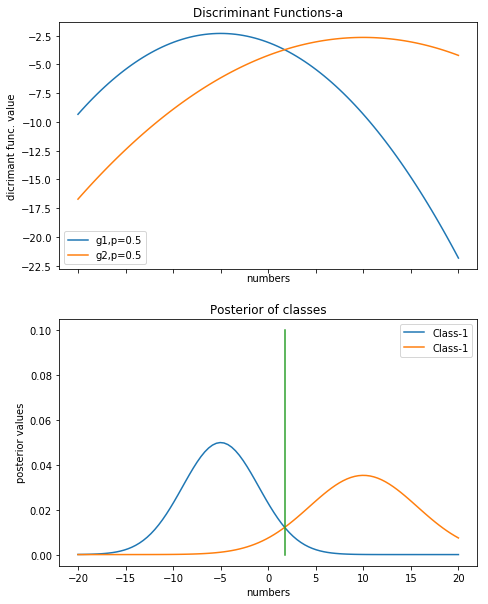

In [4]:
g1_coef,g1 = discrimant_func(-5,16,0.5)
g2_coef,g2 = discrimant_func(10,32,0.5)

g_coef= g2_coef-g1_coef

g_coef.tolist()
x_coef = np.roots(g_coef)
x_bound = x_coef[1]

g1_pdf = pdf(-5,16)*0.5
g2_pdf = pdf(10,32)*0.5

f,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(7.5,10))
ax1.plot(x,g1,label='g1,p=0.5')
ax1.plot(x,g2,label='g2,p=0.5')
ax1.legend()
ax1.set_xlabel('numbers')
ax1.set_ylabel('dicrimant func. value')
ax1.legend()
ax1.set_title('Discriminant Functions-a')
ax2.plot(x,g1_pdf,label='Class-1')
ax2.plot(x,g2_pdf,label='Class-1')
ax2.legend()
ax2.set_xlabel('numbers')
ax2.set_ylabel('posterior values')
ax2.plot([x_bound, x_bound],[0,0.10],label='Decision Boundry')
print(x_bound)
ax2.set_title('Posterior of classes')